In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
 df = pd.read_excel('edp_f.xlsx')

In [3]:
df.head()

,weather_condition,nearby_places,visibility,traffic_density,traffic_condition_min,suggested_speed
0,haze,20,5000,1076,18,4.646840
1,haze,17,5000,1062,18,4.708098
2,haze,20,5000,1027,17,4.868549
3,haze,17,5000,983,16,5.086470
4,haze,20,5000,921,15,5.428882


In [4]:
df['weather_condition'].value_counts()

weather_condition
clear sky           301
scattered clouds    280
few clouds          267
haze                260
broken clouds        66
overcast clouds      32
Unknown               1
Name: count, dtype: int64

In [5]:
# Mapping existing categories to new categories
weather_mapping = {
    'clear sky': 'clear sky',
    'scattered clouds': 'clouds',
    'few clouds': 'clouds',
    'haze': 'haze',
    'broken clouds': 'clouds',
    'overcast clouds': 'clouds'
}

# Replace categories in 'weather_condition' column
df['weather_condition'] = df['weather_condition'].replace(weather_mapping)

# Check the updated counts
print(df['weather_condition'].value_counts())


weather_condition
clouds       645
clear sky    301
haze         260
Unknown        1
Name: count, dtype: int64


In [6]:
df = df[df['weather_condition']!='Unknown']

In [7]:
df['weather_condition'].value_counts()

weather_condition
clouds       645
clear sky    301
haze         260
Name: count, dtype: int64

In [8]:
df.shape

(1206, 6)

In [9]:
df.tail()

,weather_condition,nearby_places,visibility,traffic_density,traffic_condition_min,suggested_speed
1202,clouds,7,10000,608,10,8.223684
1203,clouds,13,10000,663,11,7.541478
1204,clear sky,9,10000,661,11,7.564297
1205,clouds,20,10000,640,11,7.812500
1206,clouds,0,10000,468,8,10.683761


In [10]:
df.count()

weather_condition        1206
nearby_places            1206
visibility               1206
traffic_density          1206
traffic_condition_min    1206
suggested_speed          1206
dtype: int64

In [11]:
df.isnull().sum()

weather_condition        0
nearby_places            0
visibility               0
traffic_density          0
traffic_condition_min    0
suggested_speed          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1206
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   weather_condition      1206 non-null   object 
 1   nearby_places          1206 non-null   int64  
 2   visibility             1206 non-null   object 
 3   traffic_density        1206 non-null   int64  
 4   traffic_condition_min  1206 non-null   int64  
 5   suggested_speed        1206 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 66.0+ KB


In [13]:
df.describe()

,nearby_places,traffic_density,traffic_condition_min,suggested_speed
count,1206.000000,1206.000000,1206.000000,1206.000000
mean,15.229685,736.394693,12.280265,7.591739
std,6.454782,222.600508,3.711736,3.051251
min,0.000000,194.000000,3.000000,3.298153
25%,12.000000,583.250000,10.000000,5.664119
50%,20.000000,716.000000,12.000000,6.983240
75%,20.000000,882.750000,15.000000,8.572658
max,20.000000,1516.000000,25.000000,25.773196


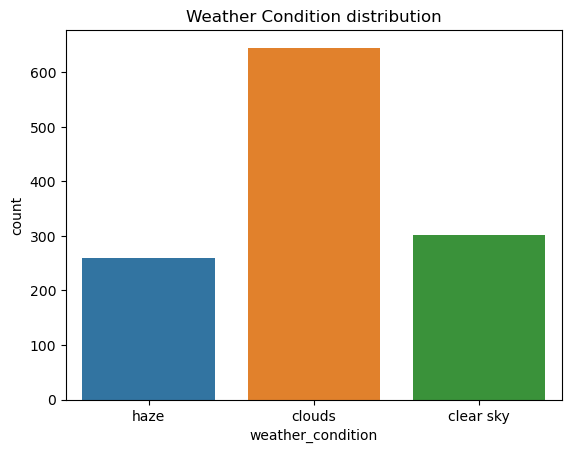

In [14]:
sns.countplot(x='weather_condition' , data = df) 
plt.title('Weather Condition distribution') 
plt.show()

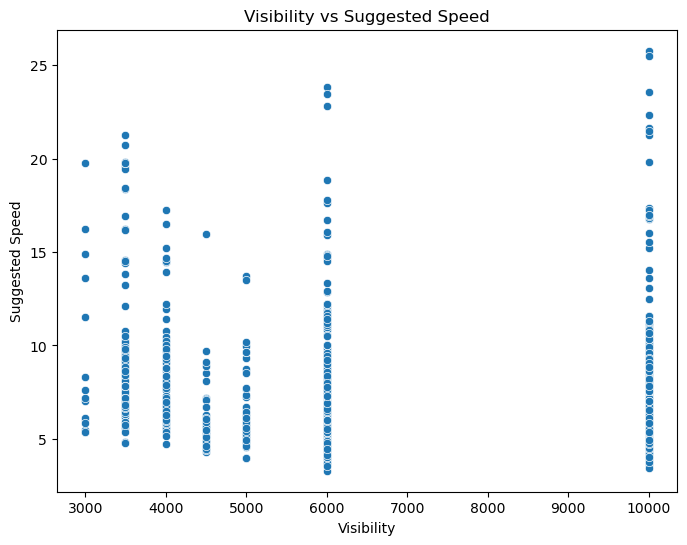

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='visibility', y='suggested_speed', data=df)
plt.title('Visibility vs Suggested Speed')
plt.xlabel('Visibility')
plt.ylabel('Suggested Speed')
plt.show()

In [16]:
df.sample(5)

,weather_condition,nearby_places,visibility,traffic_density,traffic_condition_min,suggested_speed
174,clouds,20,6000,910,15,5.494505
915,clouds,20,6000,643,11,7.776050
877,clouds,20,6000,660,11,7.575758
1144,clear sky,9,10000,535,9,9.345794
390,haze,20,4500,903,15,5.537099


In [20]:
unique_weather_conditions = df['weather_condition'].unique()
print(unique_weather_conditions)


['haze' 'clouds' 'clear sky']


In [21]:
# Perform one-hot encoding with explicit specification of categories
df_encoded = pd.get_dummies(df, columns=['weather_condition'], drop_first=True, 
                            prefix='weather', prefix_sep='_', dummy_na=False)


In [22]:
df_encoded.sample(5)

,nearby_places,visibility,traffic_density,traffic_condition_min,suggested_speed,weather_clouds,weather_haze
842,15,6000,554,9,9.025271,True,False
905,20,6000,607,10,8.237232,True,False
793,20,10000,935,16,5.347594,False,False
896,20,6000,1028,17,4.863813,True,False
286,1,10000,622,10,8.038585,False,False


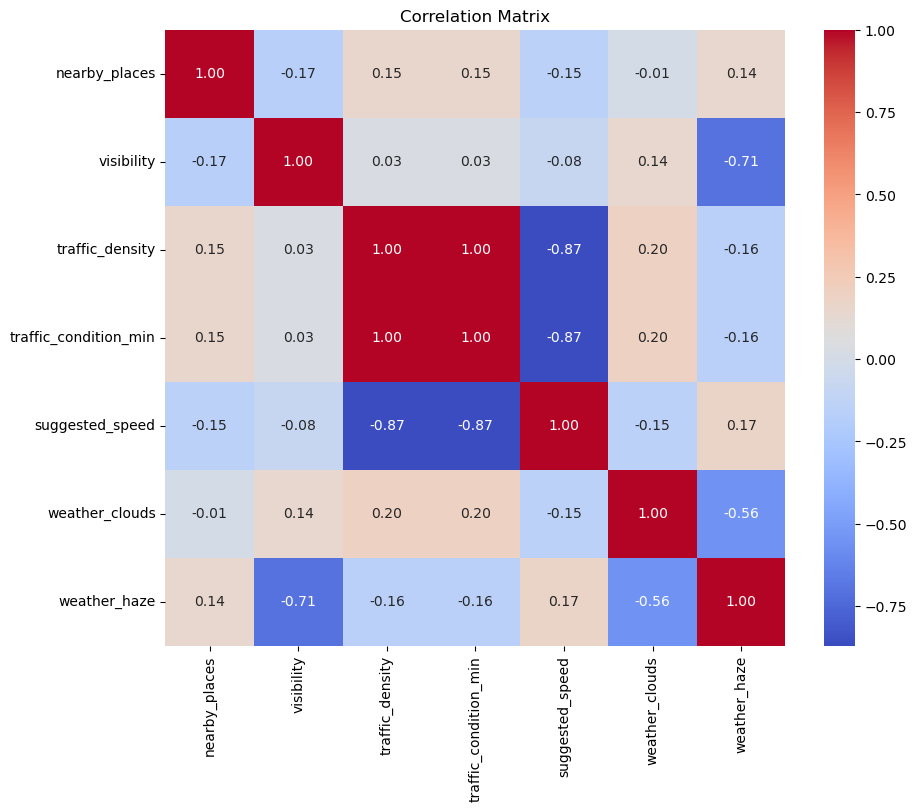

In [23]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

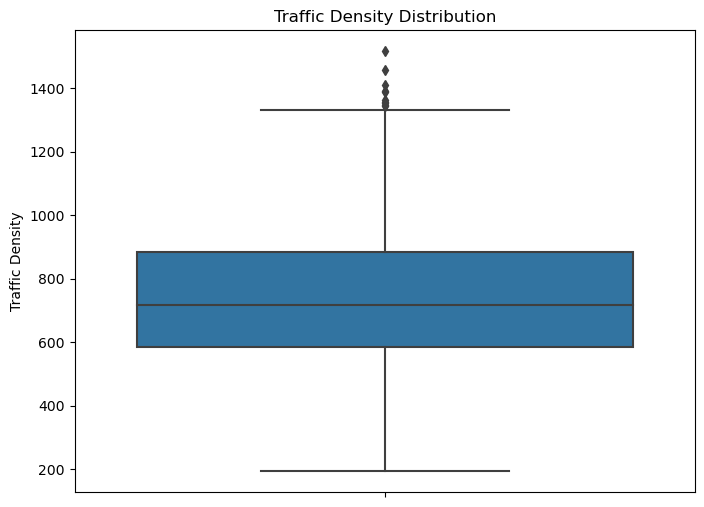

nearby_places            0
visibility               0
traffic_density          0
traffic_condition_min    0
suggested_speed          0
weather_clouds           0
weather_haze             0
dtype: int64


In [25]:
# Example further analysis
# Box plot of traffic density
plt.figure(figsize=(8, 6))
sns.boxplot(y='traffic_density', data=df_encoded)
plt.title('Traffic Density Distribution')
plt.ylabel('Traffic Density')
plt.show()

# Check for missing values
print(df_encoded.isnull().sum())


# Random Forest Algorithm:
Random Forest Regressor builds multiple decision trees during training.
Each decision tree is trained on a random subset of the training data (bootstrap samples) and a random subset of the features.
This randomness helps in reducing overfitting and improving generalization.
During prediction, each decision tree in the forest predicts an output, and the final prediction is the average (for regression) of all individual tree predictions.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = df_encoded.drop(columns=['suggested_speed'])
y = df_encoded['suggested_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0017862021492174472


# The R-squared (R2) score and mean absolute error (MAE) are both metrics used to evaluate the performance of regression models:

R-squared (R2) Score:
R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.
It ranges from 0 to 1, where:
0 indicates that the model does not explain any of the variability in the target variable.
1 indicates that the model perfectly explains the variability in the target variable.
In other words, R2 measures how well the model fits the observed data.
However, R2 does not indicate whether the model's predictions are accurate or unbiased, only how well the model fits the data.
Mean Absolute Error (MAE):
MAE is a metric that measures the average absolute difference between the predicted values and the actual values of the target variable.
It provides a measure of the average magnitude of errors in the predictions.
Unlike the R2 score, which is relative and ranges from 0 to 1, MAE is an absolute measure and is in the same units as the target variable.
Lower values of MAE indicate better model performance, as they represent smaller errors between predicted and actual values.

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R-squared Score: 0.9998384721829336
Mean Absolute Error: 0.013008714521199947


In [31]:
def predict_suggested_speed(model, nearby_places, visibility, traffic_density, traffic_condition_min, weather_clouds, weather_haze):
    # Create a DataFrame with input parameters
    input_data = pd.DataFrame({
        'nearby_places': [nearby_places],
        'visibility': [visibility],
        'traffic_density': [traffic_density],
        'traffic_condition_min': [traffic_condition_min],
        'weather_clouds': [weather_clouds],
        'weather_haze': [weather_haze]
    })
    
    # Make prediction using the model
    predicted_speed = model.predict(input_data)
    
    return predicted_speed[0]

# Example usage:
# Assuming rf_model is your trained Random Forest Regression model

predicted_speed = predict_suggested_speed(rf_model, nearby_places=1, visibility=8000, traffic_density=60, traffic_condition_min=2, weather_clouds=False, weather_haze=False)
print("Predicted Suggested Speed:", predicted_speed)


Predicted Suggested Speed: 25.29769758860428
